# Introduction - cf-python and cf-plot

## The cf in cf-python and cf-plot are to indicate that they are underpined by CF - Climate and Forecast (CF) Metadata Conventions. http://cfconventions.org

## cf-python - The python cf package implements the CF data model for the reading, writing and processing of data and metadata. https://cfpython.bitbucket.io

## cf-plot - A set of Python routines for making the common contour, vector and line plots that climate researchers use. Can also plot Numpy arrays of data. http://ajheaps.github.io/cf-plot
            
            

# Read, select, write example

In [1]:
# Inline images in Ipython Notebook - not needed in Python
%matplotlib inline

In [2]:
# Import cf-python and cf-plot
import cf
import cfplot as cfp


In [3]:
# See what versions we are using
print 'cf-python=', cf.__version__, ',cf-plot=', cfp.__version__

cf-python= 2.1.6 ,cf-plot= 2.1.75


In [4]:
# Read a data file
f=cf.read('ncas_data/data1.nc')

In [5]:
# View the contents of the file
f


[<CF Field: long_name:Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>,
 <CF Field: long_name:Ozone mass mixing ratio(time(1), pressure(23), latitude(160), longitude(320)) kg kg**-1>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: atmosphere_relative_vorticity(time(1), pressure(23), latitude(160), longitude(320)) m**2 s**-1>,
 <CF Field: atmosphere_relative_vorticity(time(1), pressure(23), latitude(160), longitude(320)) s**-1>,
 <CF Field: divergence_of_wind(time(1), pressure(23), latitude(160), longitude(320)) m**2 s**-1>,
 <CF Field: divergence_of_wind(time(1), pressure(23), latitude(160), longitude(320)) s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: geopotential(time(1), pressure(23), latitude(160), longitude(320)) m**2 s**-2>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Fi

In [6]:
# Select the air temperature
temp=f.select('air_temperature')[0]
temp

<CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>

In [7]:
# Select by index
temp=f[2]
temp

<CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>

In [8]:
# Select by long_name
vorticity=f.select('long_name:Potential vorticity')[0]

In [9]:
# See a longer list of field contents
print vorticity


Field: long_name:Potential vorticity (ncvar%PV)
-----------------------------------------------
Data           : long_name:Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1
Axes           : time(1) = [1964-01-21T00:00:00Z]
               : pressure(23) = [1000.0, ..., 1.0] mbar
               : latitude(160) = [89.1415176392, ..., -89.1415176392] degrees_north
               : longitude(320) = [0.0, ..., 358.875] degrees_east



In [10]:
# Change the standard_name of the field
vorticity.standard_name='ertel_potential_vorticity'

# View properties
vorticity.properties


<bound method Field.properties of <CF Field: ertel_potential_vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>>

In [11]:
# Write the modified field to a netCDF file
cf.write(vorticity, 'newfile.nc')





# Manipulating data in cf-python


In [12]:
# Read in some data with a time dimension
f = cf.read('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
print f

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



In [13]:
# Select a longitude
print f.subspace(longitude=0)

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(1)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(1) = [0.0] degrees_east



In [14]:
# Select a longitude
print f.subspace(X=0)

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(1)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(1) = [0.0] degrees_east



In [16]:
# Mean over a dimension
print f.collapse('longitude: mean')

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(1)) K
Cell methods   : time: mean (interval: 30 minutes) longitude: mean
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(1) = [179.0625] degrees_east



In [17]:
# Global mean
global_mean = f.collapse('X: Y: mean', weights='area')
print global_mean.array.min(), global_mean.array.max()

283.203161735 288.182342688


In [18]:
# Find the multiannual average of the seasonal (DJF, MAM, etc.) minima. 
# Use the special argument 'T: minimum within years T: mean over years' to the field's "collapse" method.
# This also requires the "within_years" parameter to define over which periods to take the minima within each year.
# Set this parameter to cf.seasons(), which will specify the four seasons of DJF, MAM, JJA, SON

g = f.collapse('T: minimum within years T: mean over years', within_years=cf.seasons())
print g
print g.item('T').dtarray


Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(4), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes) time: minimum within years time: mean over years
Axes           : height(1) = [2.0] m
               : time(4) = [1960-01-15T00:00:00Z, ..., 1960-10-16T12:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east

[<CF Datetime: 1960-01-15T00:00:00Z 365_day>
 <CF Datetime: 1960-04-16T00:00:00Z 365_day>
 <CF Datetime: 1960-07-17T00:00:00Z 365_day>
 <CF Datetime: 1960-10-16T12:00:00Z 365_day>]


# Contour plots

In [19]:
# Read a data file
f=cf.read('ncas_data/data1.nc')

In [20]:
# Use subspace to select the temperature at 500mb
t_500=temp.subspace(Z=500)
print t_500


Field: air_temperature (ncvar%T)
--------------------------------
Data           : air_temperature(time(1), pressure(1), latitude(160), longitude(320)) K
Axes           : time(1) = [1964-01-21T00:00:00Z]
               : pressure(1) = [500.0] mbar
               : latitude(160) = [89.1415176392, ..., -89.1415176392] degrees_north
               : longitude(320) = [0.0, ..., 358.875] degrees_east



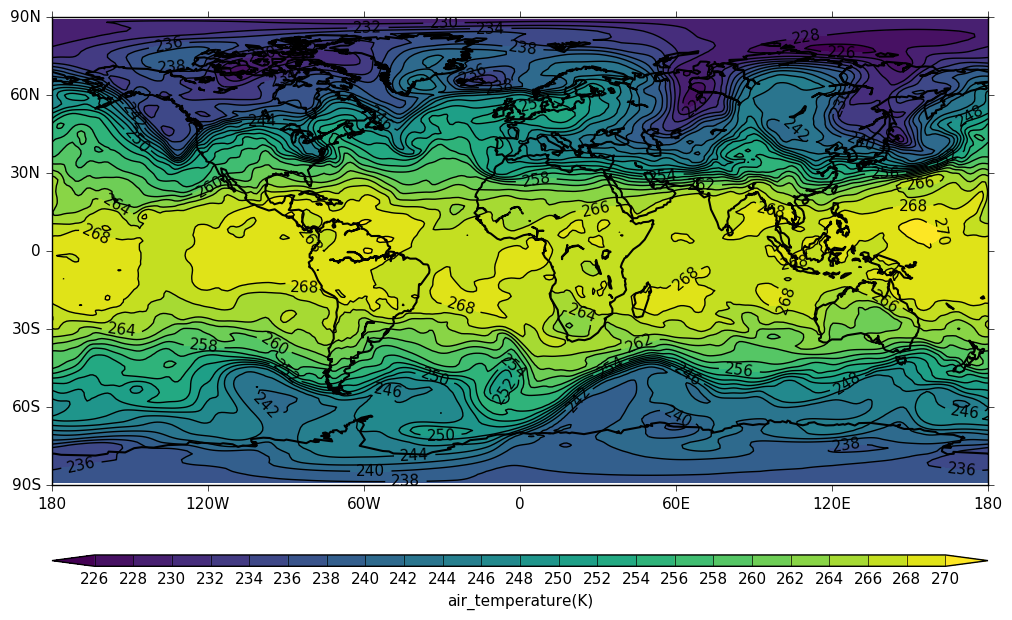

In [21]:
# Make a contour plot of the data
cfp.con(t_500)


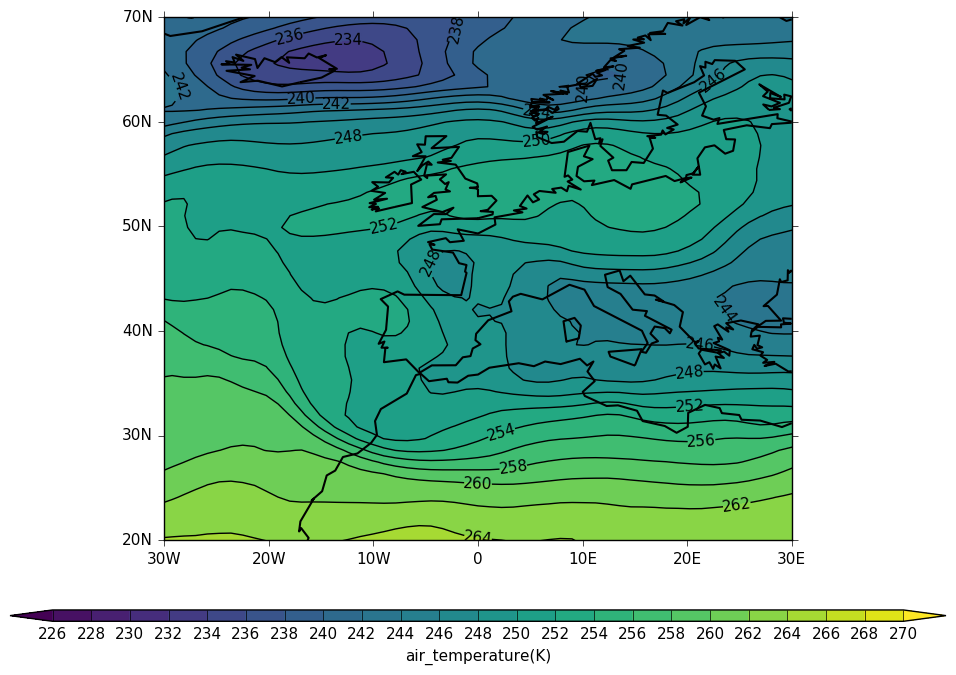

In [22]:
# Use mapset to select Europe and make a new contour plot
cfp.mapset(lonmin=-30, lonmax=30, latmin=20, latmax=70)
cfp.con(t_500)


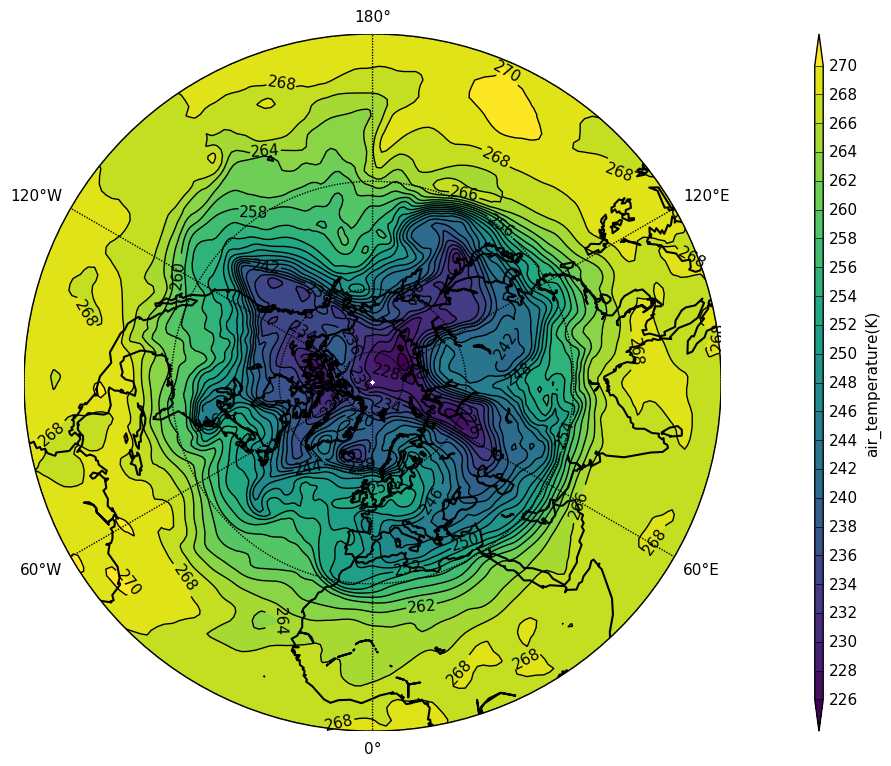

In [23]:
# Make a Northern Hemiphere polar stereographic plot
cfp.mapset(proj='npstere')
cfp.con(t_500)
cfp.mapset()


In [24]:
# Select the zonal wind and make a zonal mean of this using the collapse function in cf-python
u=f.select('eastward_wind')[0]
u_mean=u.collapse('mean', 'longitude')
print u_mean

Field: eastward_wind (ncvar%U)
------------------------------
Data           : eastward_wind(time(1), pressure(23), latitude(160), longitude(1)) m s**-1
Cell methods   : longitude: mean
Axes           : time(1) = [1964-01-21T00:00:00Z]
               : pressure(23) = [1000.0, ..., 1.0] mbar
               : latitude(160) = [89.1415176392, ..., -89.1415176392] degrees_north
               : longitude(1) = [179.4375] degrees_east



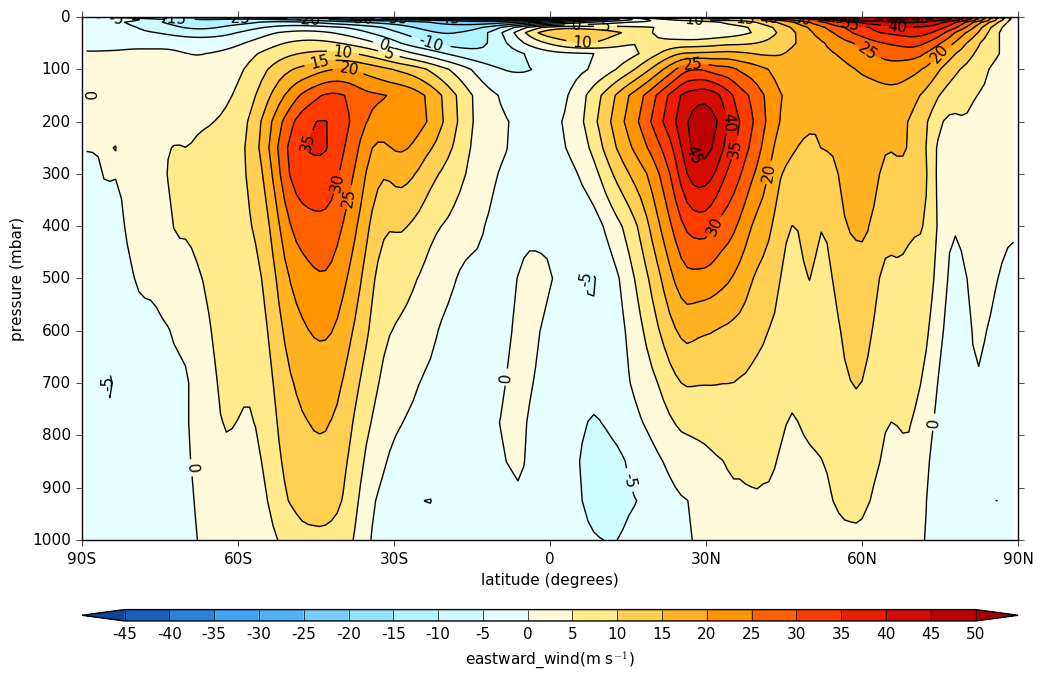

In [25]:
# Make a zonal mean zonal wind plot
cfp.con(u_mean)


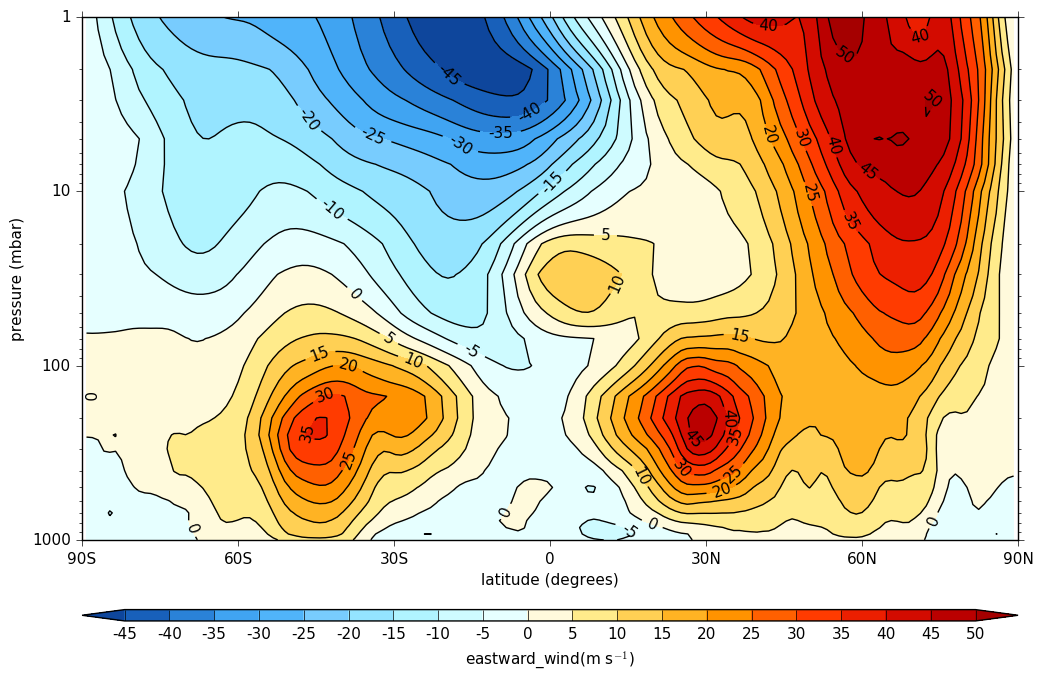

In [26]:
# Make a log y-axis plot of the zonal mean zonal wind
cfp.con(u_mean, ylog=True)


# Vector plots

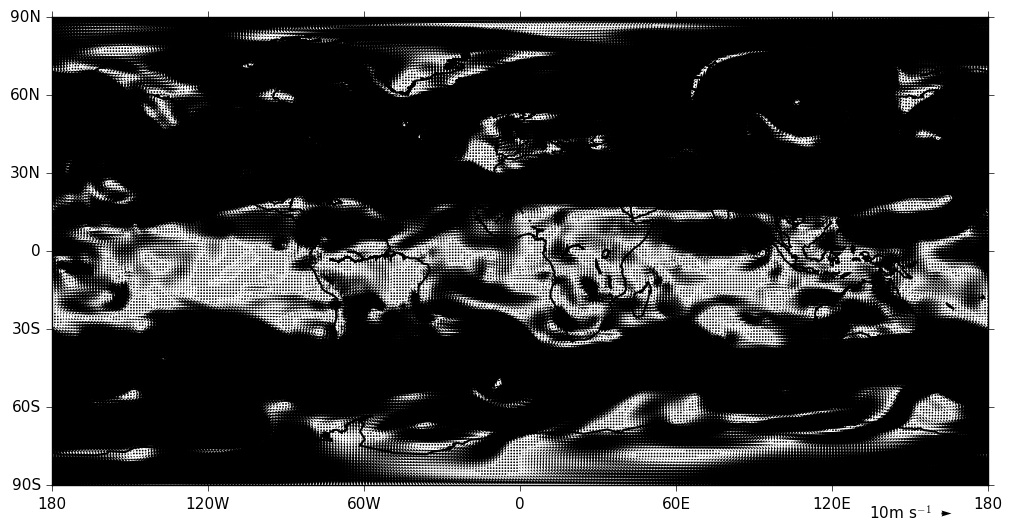

In [28]:
# Select u and v wind components at 500mb and make a vector plot
# We use a stride of 4 in plotting the vectors as the points are close together
u=f[7].subspace(pressure=500)
v=f[9].subspace(pressure=500)
cfp.vect(u=u, v=v, key_length=10, scale=100)


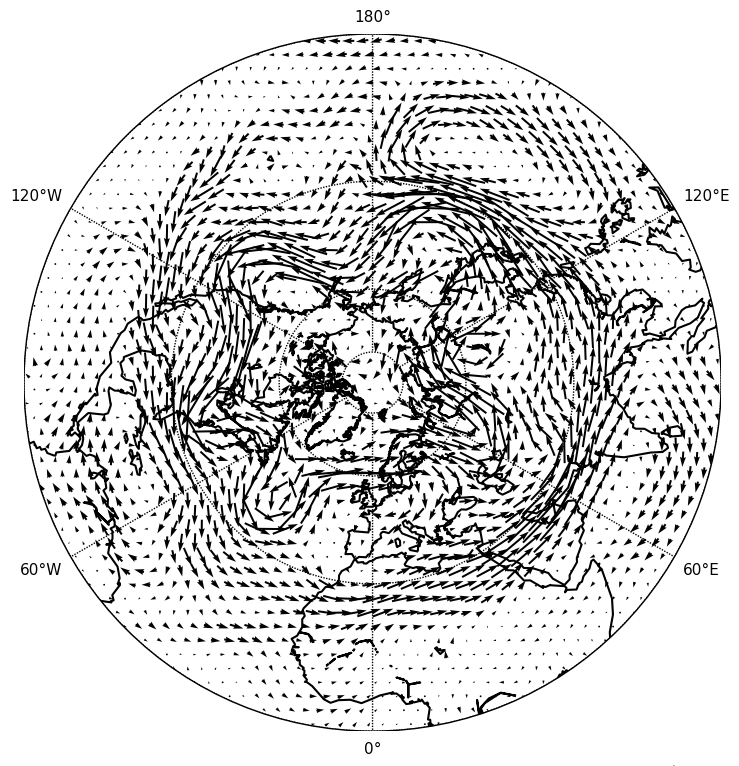

In [32]:
# Interpolate data to 50 points in X and Y
cfp.mapset(proj='npstere')
cfp.vect(u=u, v=v, key_length=10, scale=100, pts=50)


# Line plots

In [33]:
# Select the zonal mean zonal wind at 100mb
u=f[7]
u_mean=u.collapse('X: mean')
u_mean_100=u_mean.subspace(pressure=100)
print u_mean_100


Field: eastward_wind (ncvar%U)
------------------------------
Data           : eastward_wind(time(1), pressure(1), latitude(160), longitude(1)) m s**-1
Cell methods   : longitude: mean
Axes           : time(1) = [1964-01-21T00:00:00Z]
               : pressure(1) = [100.0] mbar
               : latitude(160) = [89.1415176392, ..., -89.1415176392] degrees_north
               : longitude(1) = [179.4375] degrees_east



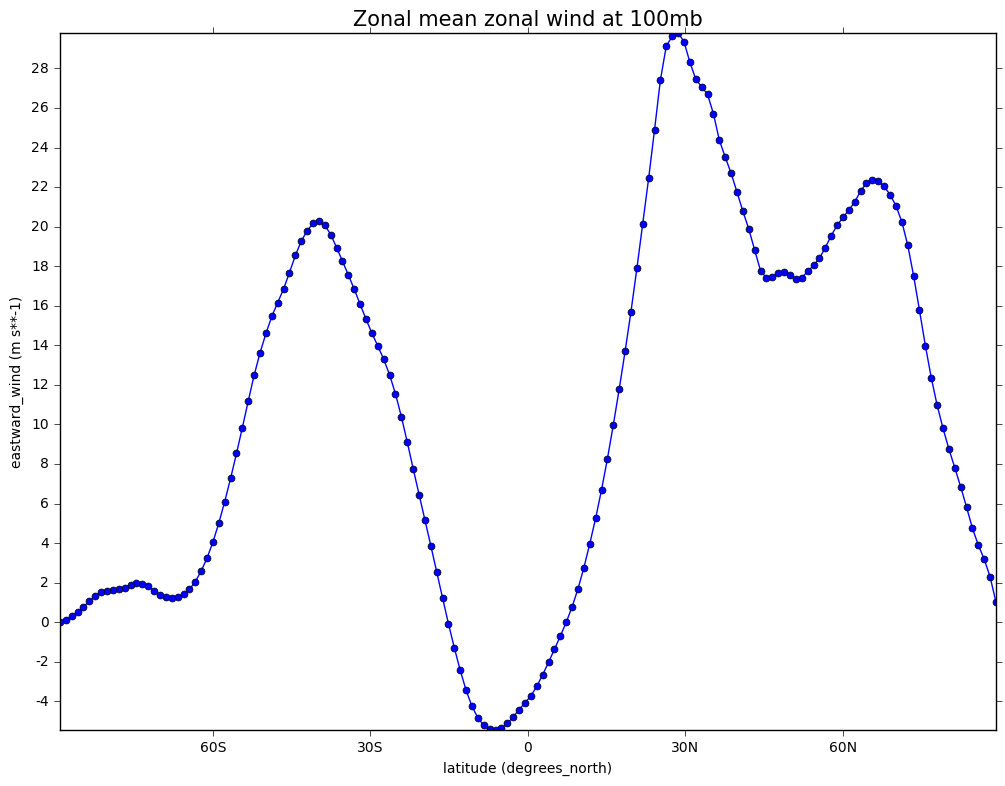

In [34]:
cfp.lineplot(u_mean_100, marker='o', color='blue', title='Zonal mean zonal wind at 100mb')


# Regridding
Regrid some temperature longitude-latitude data to another grid and make a plot of the difference between the two datasets.

In [35]:
# Read in data on two different grids
temp_era40=cf.read_field('ncas_data/data2.nc')
temp_era_in=cf.read_field('ncas_data/data3.nc')

print temp_era40, temp_era_in


Field: air_temperature (ncvar%T)
--------------------------------
Data           : air_temperature(long_name:t(1), long_name:p(1), latitude(160), longitude(320)) K
Axes           : long_name:t(1) = [1981-01-21T00:00:00Z]
               : long_name:p(1) = [1000.0] mbar
               : latitude(160) = [89.1415176392, ..., -89.1415176392] degrees_north
               : longitude(320) = [0.0, ..., 358.875] degrees_east
 Field: air_temperature (ncvar%T)
--------------------------------
Data           : air_temperature(long_name:t(1), long_name:p(1), long_name:latitude(256), long_name:longitude(512)) K
Axes           : long_name:t(1) = [1981-01-21T00:00:00Z]
               : long_name:p(1) = [1000.0] mbar
               : long_name:latitude(256) = [89.4629440308, ..., -89.4629440308] degrees_north
               : long_name:longitude(512) = [0.0, ..., 359.296875] degrees_east



In [36]:
# Perform the regridding
temp_regrid = temp_era_in.regrids(temp_era40, method='bilinear')


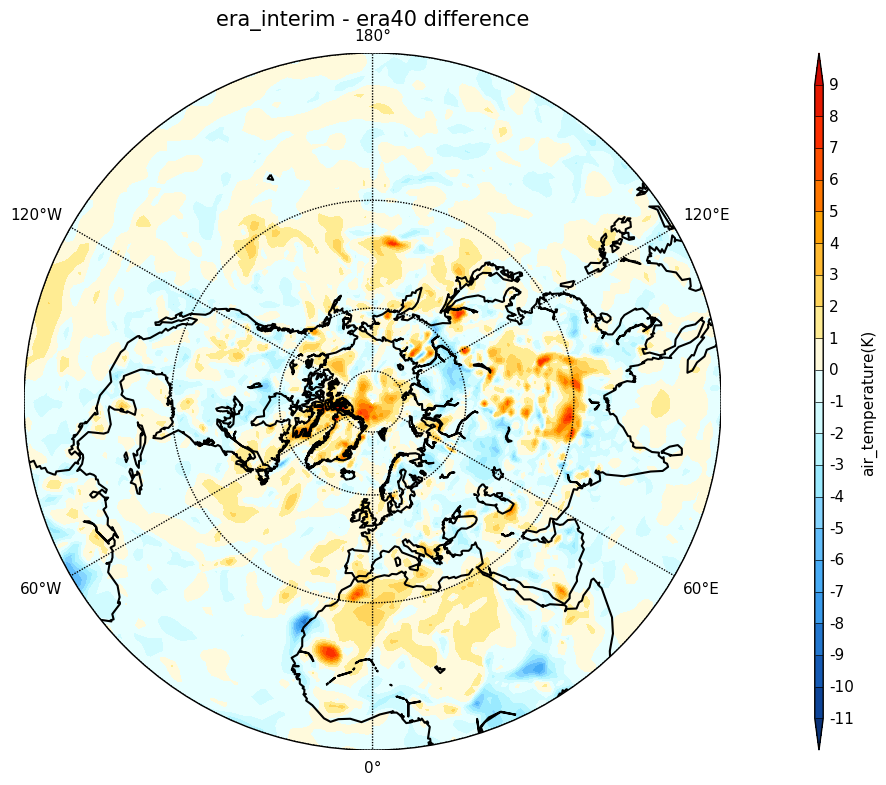

In [37]:
# Make a contour plot of the difference between the two datasets
cfp.con(temp_regrid-temp_era40, lines=False, title='era_interim - era40 difference')





# Using cf-python and cf-python

# At Reading

On jasmin1 - jasmin6: **setup anaconda**

On the Met cluster: **export PATH=/opt/tools/ncas/anaconda2/bin:$PATH**

# jasmin@CEDA
**python 2.7**

# Archer 
**module load anaconda/2.2.0-python2 cf** <br>
**module swap PrgEnv-cray PrgEnv-intel**

## Monsoon - email Met office help desk

## On a Linux laptop:
Download and install Anaconda Python 2.7 for Linux. On the command line type:<br>
**conda install -c ncas -c scitools cf-python cf-plot** <br>
**conda install -c conda-forge -c nesii netcdf-fortran=4.4.4 mpich esmpy**


# Contacts

# Any questions to:
# cf-python: David Hassell david.hassell@ncas.ac.uk
# cf-plot: Andy Heaps andy.heaps@ncas.ac.uk



